In [1]:
# project: p1
# submitter: jchalem
# partner: none
# hours: 6

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x > 10 or x<5 # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix = "esque"
suffix_match = word[len(suffix):].lower() # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match==suffix

True

In [5]:
def add(x = 2, y = 1):
    answer = x + y
    return answer

In [6]:
#q4
add(3,4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [10]:
def smart_count(num_list):
    num_list_sum = 0
    for x in num_list:
        if x > 10:
            continue
        if x < 0:
            break
        num_list_sum = add(num_list_sum, x)
    return num_list_sum

In [11]:
#q7
smart_count(nums)

14

In [12]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [13]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [14]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#q10
rows[0][-1]["x"]

8

In [16]:
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

In [17]:
#q11
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#q12
total = 0
for i in rows:
    total = add(i[header.index("B")],total)
total

10007

In [19]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [20]:
#q14
import json
f = open("usd.json")
data = json.load(f)
f.close()
#print(type(data))
data['eur']['rate'] * 400

349.983548942472

In [21]:
def divide(x, y = 0):
    try:
        quotient = x/y
        return quotient
    except ZeroDivisionError:
        return float("nan")

In [22]:
#q15

divide(3,2)

1.5

In [23]:
#q16

divide(-3,0)

nan

In [24]:
import os, pandas as pd

In [25]:
years = {}
for i in os.listdir("home-computers"):
    df = pd.read_csv(os.path.join("home-computers",i), header = 1)
    df = df.set_index("Geographic Area Name")
    years[int(i[i.index(".")-4:i.index(".")])] = df

In [26]:
#q17

sorted(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [27]:
#q18

s18 = years[2018]
s18.loc["Wisconsin","Estimate!!Total"]

2371960

In [28]:
#q19

s19 = s18["Estimate!!Total!!No Computer"]
s19.sum()

10285814

In [29]:
#q20

s20 = s18["Margin of Error!!Total!!No Computer"]
s_margin = s20/s19
s_margin.max()

0.12375641594322287

In [30]:
#q21

bordering_states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
#s1[bordering_states]
s21 = s18.loc[bordering_states,"Estimate!!Total"]
bordering_states_percent = (s19[bordering_states]/s21)*100
bordering_states_percent.to_dict()

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

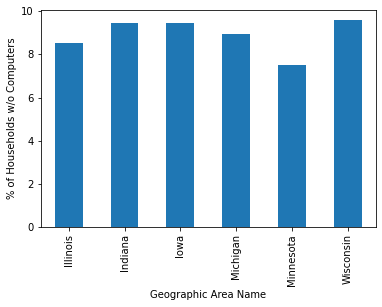

In [31]:
#q22

ax = bordering_states_percent.plot.bar()
ax = ax.set_ylabel("% of Households w/o Computers")

In [32]:
wi = {}
for i in years:
    wi[i] = years[i].loc["Wisconsin","Estimate!!Total!!No Computer"]/1000
wi = pd.Series(wi).sort_index()

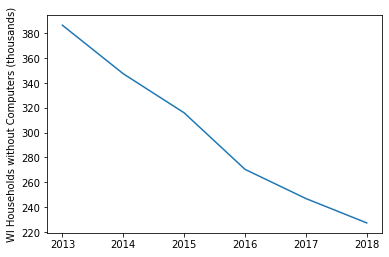

In [33]:
#q23

bx = wi.plot.line()
bx = bx.set_ylabel("WI Households without Computers (thousands)")

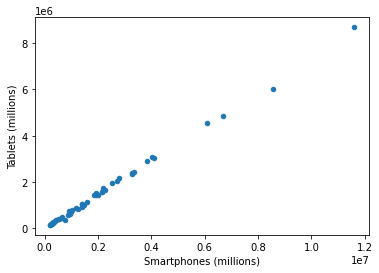

In [34]:
#q24

s24 = s18[["Estimate!!Total!!Has one or more types of computing devices!!Smartphone",
   "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]]

cx = s24.plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone",
                     y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"
                     )
cx = cx.set(xlabel = "Smartphones (millions)", ylabel = "Tablets (millions)")

In [35]:
from subprocess import check_output
check_output(["git", "checkout","main"],cwd = "flask", encoding="utf-8")

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


"Your branch is up to date with 'origin/main'.\n"

In [36]:
#q25
flask_gitlog = str(check_output(["git", "log"], cwd = "flask",encoding="utf-8")).split("\n")
flask_gitlog[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [37]:
#q26

gitcommits = []
for line in flask_gitlog:
    if line[:6] == "commit":
        gitcommits.append(line[7:])
gitcommits[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [38]:
#q27

check_output(["git", "checkout",gitcommits[-3]],cwd = "flask", encoding="utf-8")
f = open("flask/README", "r")
readme = f.read()
f.close()
readme

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [39]:
#q28

user_count = {}
for i in flask_gitlog:
    if "Merge pull request" in i and "/" in i:
        username = i[(i.find("from") + 5):i.find("/")]
        if username not in user_count:
            user_count[username] = 0
        user_count[username] += 1
user_count

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [40]:
#q29

import subprocess
from subprocess import PIPE
try:
    check_output(["pip3", "instal"], stderr = PIPE, encoding = "utf-8")
except subprocess.CalledProcessError as e:
    output = str(e.stderr)
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [41]:
import numpy as np
import time
times_df = pd.DataFrame(dtype=float)

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])


In [42]:
for i in range(1000,6000, 1000):
    df = rand_df(i)
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    times_df.at[i, "Iter rows"] = (t1 - t0)*1000

In [43]:
for i in range(1000,6000,1000):
    df = rand_df(i)
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    times_df.at[i, "Iter tuples"] = (t1 - t0)*1000

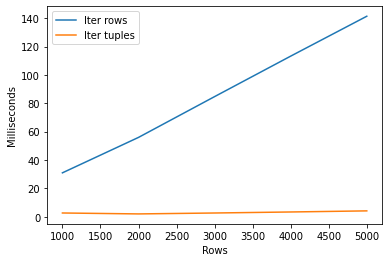

In [44]:
#q30

ax = times_df.plot.line()
ax = ax.set(xlabel = "Rows", ylabel = "Milliseconds")

In [45]:
times_df = pd.DataFrame(dtype=float)
for i in range(1000, 6000, 1000):
    df = rand_df(i)
    total = 0
    t0 = time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    times_df.at[i, "Loc"] = (t1 - t0) * 1000

In [46]:
for i in range(1000, 6000, 1000):
    df = rand_df(i)
    total = 0
    t0 = time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time.time()
    times_df.at[i, "At"] = (t1 - t0) * 1000

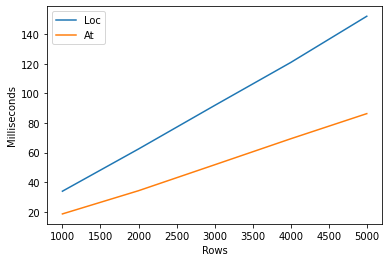

In [47]:
#q31

ax = times_df.plot.line()
ax = ax.set(xlabel = "Rows", ylabel = "Milliseconds")

In [48]:
times_df = pd.DataFrame(dtype=float)
def laugh(x):
    return "ha" * x

In [49]:
for i in range(1000,21000,1000):
    df = rand_df(i)
    result = []
    t0 = time.time()
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    times_df.at[i, "Loop"] = (t1 - t0) * 1000

In [50]:
for i in range(1000,21000,1000):
    df = rand_df(i)
    result =[]
    to = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    times_df.at[i, "Apply"] = (t1 - t0) * 1000

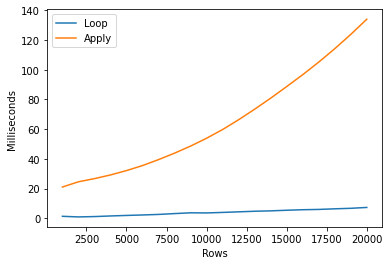

In [51]:
#q32

ax = times_df.plot.line()
ax = ax.set(xlabel = "Rows", ylabel = "Milliseconds")